# Sargassum Density From AFAI

The goal of this notebook is to convert AFAI data into Saragassum density.

In [1]:
using NetCDF
using Dates

In [2]:
using Makie, CairoMakie
include(joinpath(@__DIR__, "..", "..", "CustomMakie.jl", "src", "geo-methods.jl"))
include(joinpath(@__DIR__, "../../CustomMakie.jl/src/statistic-methods.jl"))

axis (generic function with 1 method)

## Testing

We use the 7-day cumulative AFAI data from [NOAA](https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_atlantic_oceanwatch_AFAI_7D.html). Specifically, we start with April 1 2018 - May 1 2018 and choose a stride of 7 days such that there should be four data snapshots which each correspond to one week of April. The netCDF is downloaded from here [click to download (~200 MB)](https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_atlantic_oceanwatch_AFAI_7D.nc?AFAI[(2018-04-01T00:00:00Z):7:(2018-05-01T00:00:00Z)][(0.0):1:(38.0)][(-98.0):1:(-38.0)]).

In [3]:
raw_filename = "afai-7day-0015deg.nc"
ncinfo(raw_filename)


##### NetCDF File #####

/Users/gagebonner/Desktop/Repositories/SargassumFromAFAI.jl/7day-0.015degree/afai-7day-0015deg.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
latitude                                            2534                      
time                                                5                         
longitude                                           4001                      

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
AFAI                            FLOAT           longitude latitude time         
latitude                        DOUBLE          latitude                        
time                            DOUBLE          time                            
longitude                

### Time

The time is measured in `seconds since 1970-01-01T00:00:00Z`.

In [4]:
tref = DateTime(1970, 1, 1, 0, 0, 0)
time = tref + Second.(ncread(raw_filename, "time"))

5-element Vector{DateTime}:
 2018-04-01T12:00:00
 2018-04-08T12:00:00
 2018-04-15T12:00:00
 2018-04-22T12:00:00
 2018-04-29T12:00:00

### Latitude and Longitude

Latitude is in `degrees N/S` and longitude is in `degrees E/W`.

In [5]:
lat = ncread(raw_filename, "latitude")
lon = ncread(raw_filename, "longitude")

4001-element Vector{Float64}:
 -98.0
 -97.985
 -97.97
 -97.955
 -97.94
 -97.925
 -97.91
 -97.895
 -97.88
 -97.865
   ⋮
 -38.120000000000005
 -38.105000000000004
 -38.09
 -38.075
 -38.06
 -38.045
 -38.03
 -38.015
 -38.0

### AFAI Data

The AFAI is the 7-day cumulative value in reflectance units. It takes values in `(-0.004, 0.006)` and has a fill value of `NaN`. Its dimensions are `(longitude, latitude, time)`.

In [7]:
afai = ncread(raw_filename, "AFAI");
size(afai)

(4001, 2534, 5)

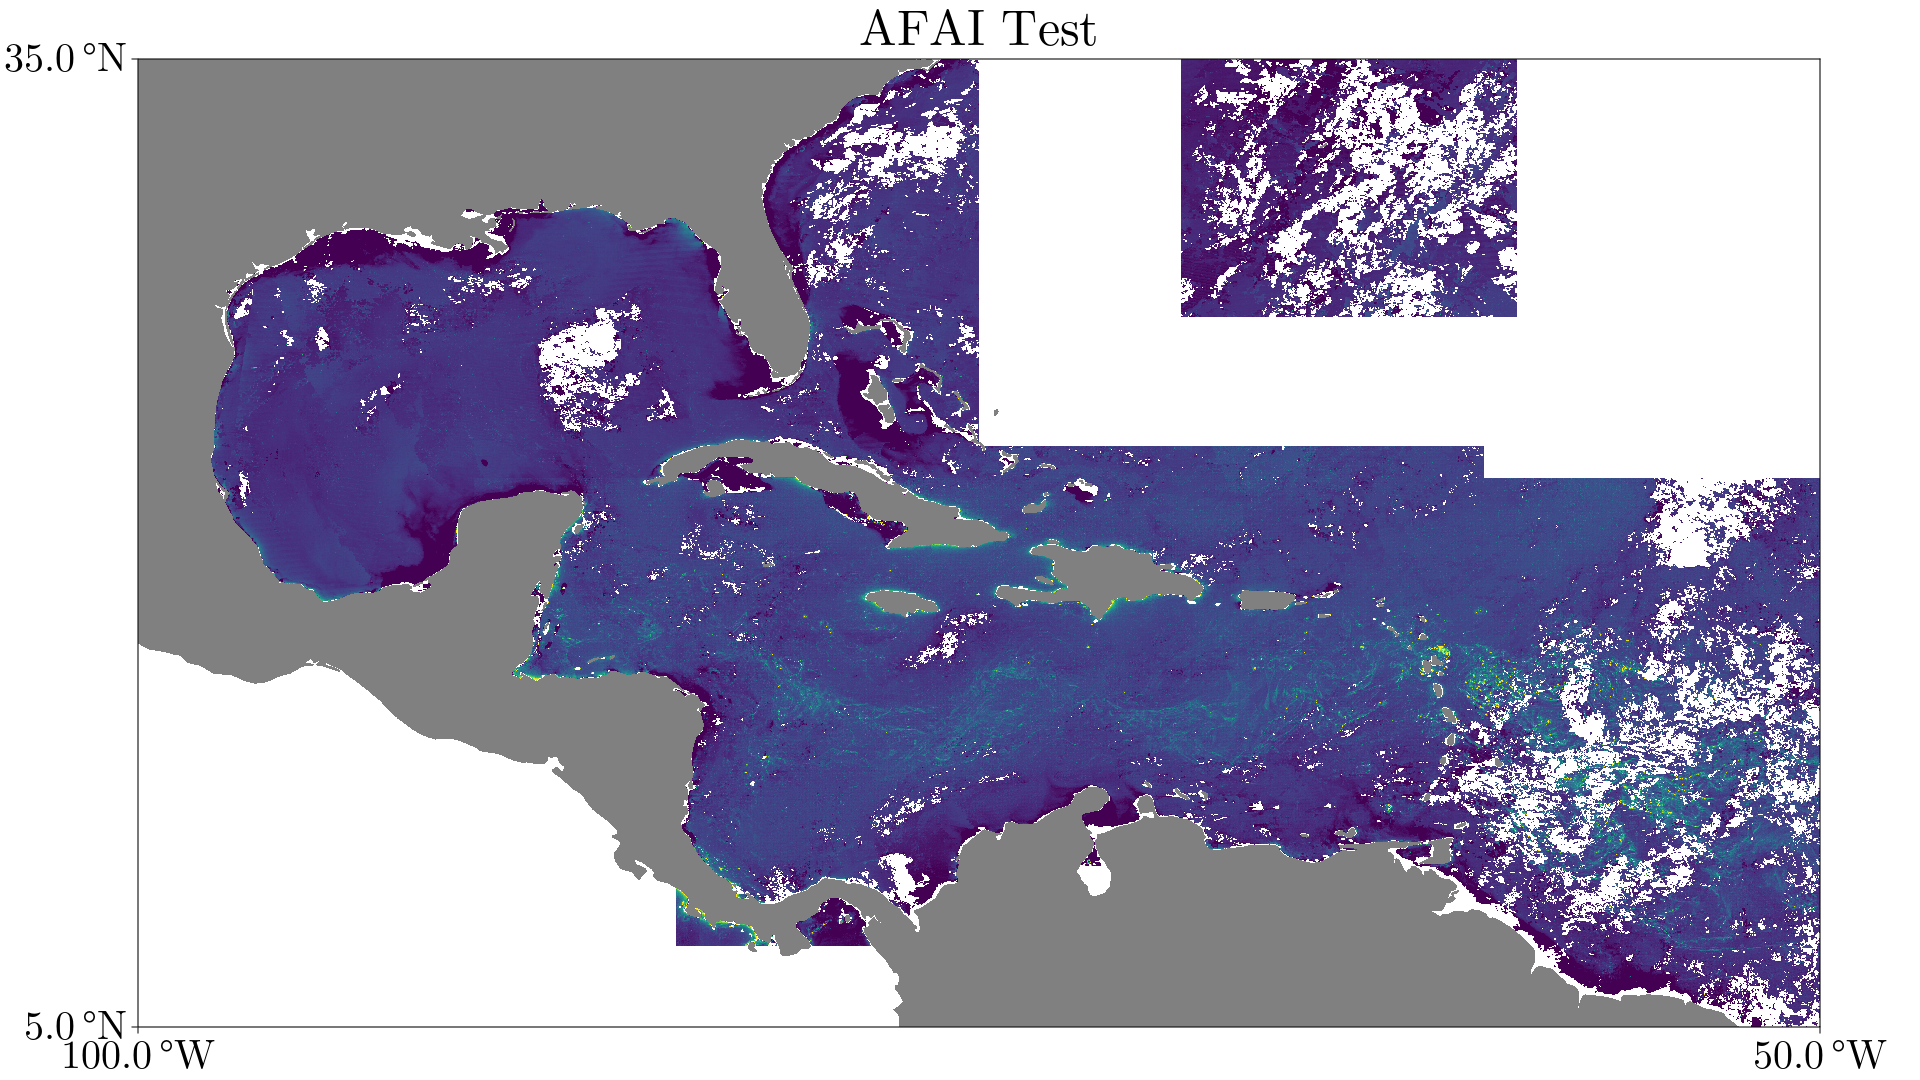

In [16]:
fig = default_fig()
ax = geo_axis(fig[1, 1], title = L"\text{AFAI Test}")
heatmap!(ax, lon, lat, afai[:,:,1])
land!(ax)
fig